# Final Report

## Table of Contents
## Step 1: Importing libraries and data files
## Step 2: Addressing security Implications
## Step 3.1: Regional segmentation of the data
## Step 3.2: Difference in spending habits between the different U.S. regions
## Step 4: Exclusion flag for low-activity customers 
## Step 5: Creating profiling variables based on age, income, certain goods in the “department_id” column, and number of dependents/familiy status 
### Age
### Income
### Department
### Family status
## Step 6: Visualization to show the distribution of profiles
## Step 7: Aggregation of the max, mean, and min variables on a customer-profile level for usage frequency and expenditure
## Step 8: Comparison of customer profiles with regions and departments
## Step 9: Charts to illustrate the results 
### Visualizations for profiles by region
### Visualizations for profiles by department
## Step 10: Exporting the data file
## Further analysis to answer other project questions

## Step 1: Importing libraries and data files

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing data file

path = r'C:\Users\Lenovo\Documents\Instacart Basket Analysis'
df_combined = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'all_combined_2.pkl'))

In [3]:
# Checking df after importing

df_combined.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,ord_frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,0.0,196,1,0,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [4]:
df_combined.shape

(32404859, 33)

## Step 2: Addressing security implications

I will remove the columns first_name and last_name, so no customer will be personally identifiable.

In [5]:
df_combined = df_combined.drop(columns = ['first_name', 'last_name'])  

In [6]:
# Checking the output

df_combined.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_label', 'busiest_day',
       'busiest_day_2', 'busiest_hour_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median', 'ord_frequency_flag', 'gender',
       'state', 'age', 'date_joined', 'number_of_dependants', 'marital_status',
       'income'],
      dtype='object')

There are no other security concerns.

## Step 3.1: The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [16]:
# Creating an empty region list that will become the 'region' column

region = []

In [17]:
# Checking to see how the states are written in the df

df_combined['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [18]:
# Filling the empty list

for value in df_combined['state']:
    if value in ['Maine','New Hampshire', 'Vermont', 'Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']:
        region.append('Northeast')
    elif value in ['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']:
        region.append('Midwest')
    elif value in ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']:
        region.append('South')
    else:
        region.append('West')

In [19]:
# Printing the region list

region

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [20]:
# Adding 'region' column to df

df_combined['region'] = region

In [21]:
# Checking the frequency distribution 

df_combined['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

## Step 3.2: Determine whether there’s a difference in spending habits between the different U.S. regions. 

In [30]:
# Creating a crosstab between 'region' and 'spending_flag'

crosstab_region_spending = pd.crosstab(df_combined['region'], df_combined['spending_flag'], dropna = False)

In [31]:
# Checking the output

crosstab_region_spending

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


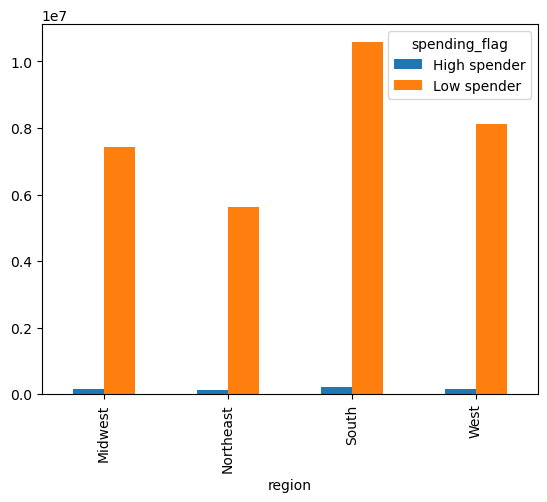

In [33]:
# Creating a stacked bar chart

region_spending_bar = crosstab_region_spending.plot.bar()

In [34]:
# Exporting the viz

region_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spending_bar.png'))

## Step 4: The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [17]:
# Creating the exclusion flag

df_combined.loc[df_combined['max_order'] < 5, 'low_order_flag'] = 'Low-activity customer'

In [18]:
df_combined.loc[df_combined['max_order'] >= 5, 'low_order_flag'] = 'High-activity customer'

In [19]:
# Creating a sample with only high-activity customers

df_high = df_combined[df_combined['low_order_flag'] == 'High-activity customer']

In [20]:
# Exporting the sample 

df_high.to_pickle(os.path.join(path,'02 Data','Prepared Data','all_combined_high.pkl'))

## Step 5: The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. 

### Age

In [38]:
# Creating an age_profile

df_combined.loc[df_combined['age'] <= 35, 'age_profile'] = 'Young'

In [39]:
df_combined.loc[(df_combined['age'] > 35) & (df_combined['age'] < 65), 'age_profile'] = 'Middle-aged'

In [40]:
df_combined.loc[df_combined['age'] >= 65, 'age_profile'] = 'Senior'

In [41]:
# Frequency distribution for 'age_profile'

df_combined['age_profile'].value_counts(dropna = False)

Middle-aged    14683356
Young           9146419
Senior          8575084
Name: age_profile, dtype: int64

### Income

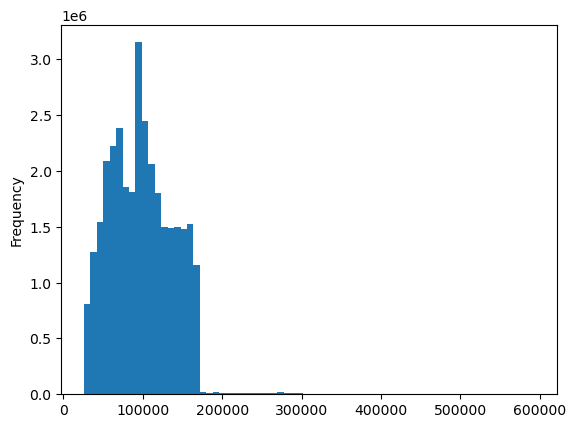

In [44]:
# Creating a histogram of customer income

hist_cust_income = df_combined['income'].plot.hist(bins = 70)

In [45]:
# Creating the income_profile

df_combined.loc[df_combined['income'] < 75000, 'income_profile'] = 'Low income'

In [46]:
df_combined.loc[(df_combined['income'] >= 75000) & (df_combined['income'] < 125000), 'income_profile'] = 'Mid income'

In [47]:
df_combined.loc[df_combined['income'] >= 125000, 'income_profile'] = 'High income'

In [48]:
# Frequency distribution for income_profile

df_combined['income_profile'].value_counts(dropna = False)

Mid income     13331136
Low income     10442766
High income     8630957
Name: income_profile, dtype: int64

### Department

I will use the department_id column to separate the customers into vegans and non-vegans.

Vegans don't eat meat/seafood (department_id=12) or dairy/eggs(department_id=16).

I don't want to label each purchase as vegan or non-vegan, but the customer as vegan or non-vegan, based on their purchases.Therefore, I will make a crosstab first.

In [49]:
# Creating a crosstab between department_id and user_id

dep_user_cross = pd.crosstab(df_combined['department_id'], df_combined['user_id'], dropna = False)

In [50]:
# Assigning nutrition flags to users and storing them in a Python dictionary

vegan_dict = dict()
for user in dep_user_cross:
    workinglist = dep_user_cross[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:   # the index starts at 0, so index 0 corresponds to dep_id=1
        vegan_dict[user] = 'Vegan'
    else:
        vegan_dict[user] = 'Non-vegan'

In [51]:
# Assigning user flags to the vegan_flag

vegan_flag = []
for user in df_combined['user_id']:
    vegan_flag.append(vegan_dict[user])

In [52]:
# Adding vegan_flag to df as vegan_profile

df_combined['vegan_profile'] = vegan_flag

In [55]:
# Checking frequency distribution for vegan_profile

df_combined['vegan_profile'].value_counts(dropna = False)

Non-vegan    32021432
Vegan          383427
Name: vegan_profile, dtype: int64

In the same way, I will use the department_id column to separate the customers into pet owners (department_id = 8) and no pet owners.

In [53]:
# Assigning pet flags to users and storing it in a dictionary

pet_dict = dict()
for user in dep_user_cross:
    workinglist = dep_user_cross[user].tolist()
    if workinglist[7] == 0 :      # the index starts at 0, so index 0 corresponds to dep_id=1
        pet_dict[user] = 'No pet'
    else:
        pet_dict[user] = 'Pet owner'

In [54]:
# Assigning user flags to the pet_flag

pet_flag = []
for user in df_combined['user_id']:
    pet_flag.append(pet_dict[user])

In [56]:
# Adding pet_flag column to as pet_profile

df_combined['pet_profile'] = pet_flag

In [57]:
# Checking frequency distribution for pet_profile

df_combined['pet_profile'].value_counts(dropna = False)

No pet       28876718
Pet owner     3528141
Name: pet_profile, dtype: int64

### Family status

In [58]:
# Frequency distribution for marital_status

df_combined['marital_status'].value_counts(dropna = False)

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: marital_status, dtype: int64

In [59]:
# Creating a crosstab between number_of_dependants and martial_status

family_crosstab = pd.crosstab(df_combined['marital_status'], df_combined['number_of_dependants'], dropna = False)

In [60]:
family_crosstab

number_of_dependants,0,1,2,3
marital_status,,,,
divorced/widowed,2771812,0,0,0
living with parents and siblings,0,530200,507963,512440
married,0,7550904,7583180,7622669
single,5325691,0,0,0


The family_crosstab shows no single adults or divorced/widowed adults with dependants, e.g. children.
Thereofre, I will combine information from marital_status and number_of_dependants to define the following family profiles:
(family_status = married) and (number_of_dependents == 1) : married, no children
(family_status = married) and (number_of_dependents >= 2) : married with children
(family_status in (single, divorced/widowed, living with parents and siblings)) and (number_of_dependents == 0) : single, no children
(family_status in (single, divorced/widowed, living with parents and siblings)) and (number_of_dependents >= 1) : single with children/dependants

In [61]:
# Creating the 'family_profile' column with labeling as above

df_combined.loc[(df_combined['marital_status'] == 'married') & (df_combined['number_of_dependants'] == 1), 'family_profile'] = 'Married no children'

In [62]:
df_combined.loc[(df_combined['marital_status'] == 'married') & (df_combined['number_of_dependants'] >= 2), 'family_profile'] = 'Married with children'

In [63]:
df_combined.loc[(df_combined['marital_status'] != 'married') & (df_combined['number_of_dependants'] == 0), 'family_profile'] = 'Single no children'

In [64]:
df_combined.loc[(df_combined['marital_status'] != 'married') & (df_combined['number_of_dependants'] >= 1), 'family_profile'] = 'Single with children/dependants'

In [65]:
# Frequency distribution for family_profile

df_combined['family_profile'].value_counts(dropna = False)

Married with children              15205849
Single no children                  8097503
Married no children                 7550904
Single with children/dependants     1550603
Name: family_profile, dtype: int64

## Step 6: Create an appropriate visualization to show the distribution of profiles.

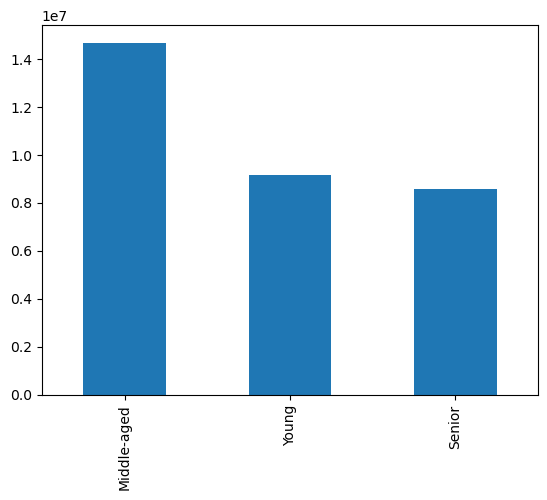

In [66]:
# age_profile

age_profile_bar = df_combined['age_profile'].value_counts().plot.bar()

In [63]:
# Exporting the viz

age_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_profile_bar.png'))

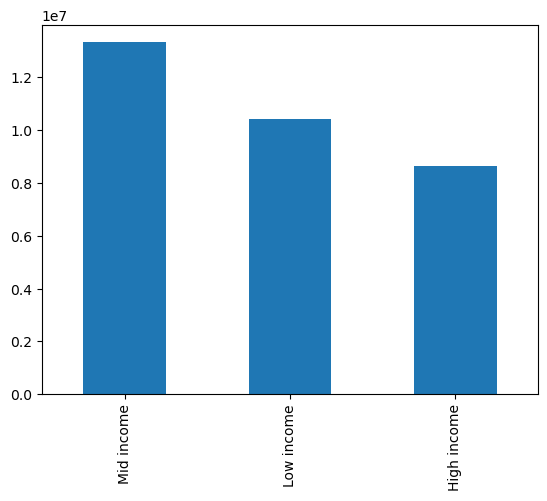

In [67]:
# income_profile

income_profile_bar = df_combined['income_profile'].value_counts().plot.bar()

In [66]:
# Exporting the viz

income_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_profile_bar.png'))

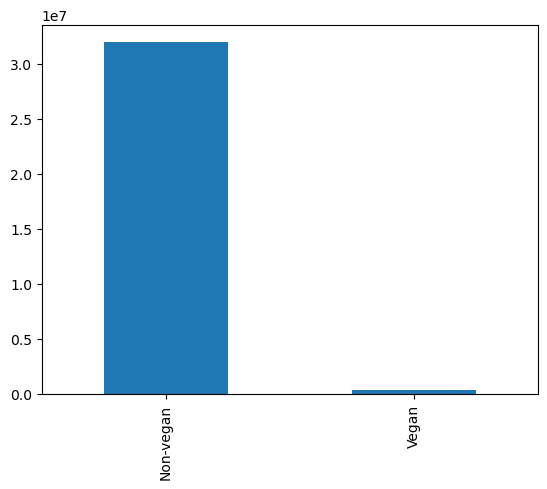

In [74]:
# vegan_profile

vegan_profile_bar = df_combined['vegan_profile'].value_counts().plot.bar()

In [75]:
# Exporting the viz

vegan_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegan_profile_bar.png'))

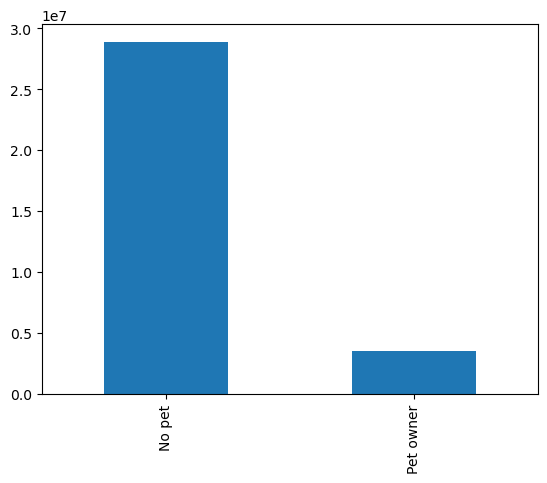

In [70]:
# pet_profile

pet_profile_bar = df_combined['pet_profile'].value_counts().plot.bar()

In [72]:
# Exporting the viz

pet_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_profile_bar.png'))

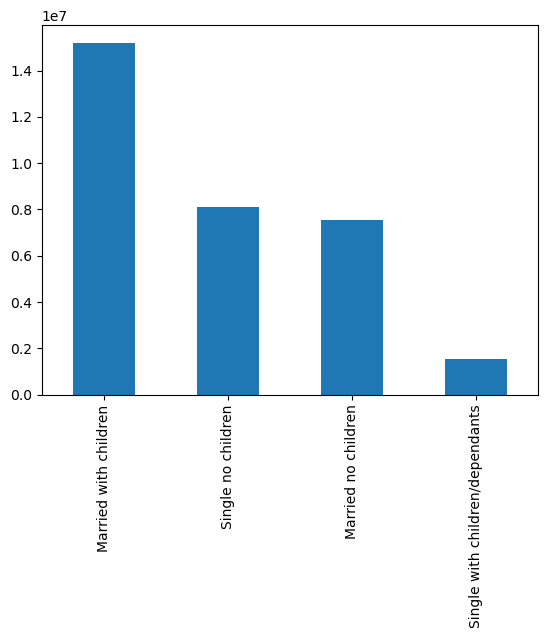

In [69]:
# family_profile

family_profile_bar = df_combined['family_profile'].value_counts().plot.bar()

In [73]:
# Exporting the viz

family_profile_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_profile_bar.png'))

## Step 7: Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [75]:
# age_profile stats

df_combined.groupby('age_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                              mean   max  min      mean   max  min
age_profile                                                       
Middle-aged              10.395270  30.0  0.0  7.791435  25.0  1.0
Senior                   10.367885  30.0  0.0  7.796546  25.0  1.0
Young                    10.411732  30.0  0.0  7.785081  25.0  1.0

In [76]:
# income_profile stats

df_combined.groupby('income_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                 mean   max  min      mean   max  min
income_profile                                                       
High income                 10.330294  30.0  0.0  7.957172  25.0  1.0
Low income                  10.490422  30.0  0.0  7.434729  25.0  1.0
Mid income                  10.356481  30.0  0.0  7.962545  25.0  1.0

In [77]:
# vegan_profile stats

df_combined.groupby('vegan_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                                mean   max  min      mean   max  min
vegan_profile                                                       
Non-vegan                   10.36267  30.0  0.0  7.800348  25.0  1.0
Vegan                       12.89809  30.0  0.0  7.009920  20.0  1.0

In [78]:
# pet_profile stats

df_combined.groupby('pet_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices           
                              mean   max  min      mean   max  min
pet_profile                                                       
No pet                   10.465651  30.0  0.0  7.788360  25.0  1.0
Pet owner                 9.795345  30.0  0.0  7.812556  25.0  1.0

In [79]:
# family_profile stats

df_combined.groupby('family_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices  \
                                                  mean   max  min      mean   
family_profile                                                                
Married no children                          10.397248  30.0  0.0  7.795712   
Married with children                        10.406308  30.0  0.0  7.788203   
Single no children                           10.371750  30.0  0.0  7.789975   
Single with children/dependants              10.345887  30.0  0.0  7.800712   

                                            
                                  max  min  
family_profile                              
Married no children              25.0  1.0  
Married with children            25.0  1.0  
Single no children               25.0  1.0  
Single with children/dependants  25.0  1.0

## Step 8: Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

### Customer profiles by Region

#### Age

In [82]:
# Creating a crosstab comparing 'age_profile' and 'region', looking at percentages for better comparability

age_region_cross = pd.crosstab(df_combined['age_profile'], df_combined['region'], normalize = 'columns')

In [83]:
age_region_cross

region,Midwest,Northeast,South,West
age_profile,,,,
Middle-aged,0.459602,0.444810,0.451132,0.455511
Senior,0.262045,0.271531,0.262814,0.264573
Young,0.278353,0.283659,0.286054,0.279916


The age groups are similarly big across different regions.

#### Income

In [84]:
# Creating a crosstab comparing 'income_profile' and 'region', looking at percentages for better comparability

income_region_cross = pd.crosstab(df_combined['income_profile'], df_combined['region'], normalize = 'columns')

In [85]:
income_region_cross

region,Midwest,Northeast,South,West
income_profile,,,,
High income,0.270318,0.268977,0.262824,0.265481
Low income,0.319571,0.318405,0.323667,0.325550
Mid income,0.410111,0.412618,0.413510,0.408968


The income groups are similarly big across different regions.

#### Veganism

In [87]:
# Creating a crosstab comparing 'vegan_profile' and 'region', looking at percentages for better comparability

vegan_region_cross = pd.crosstab(df_combined['vegan_profile'], df_combined['region'], normalize = 'columns')

In [88]:
vegan_region_cross 

region,Midwest,Northeast,South,West
vegan_profile,,,,
Non-vegan,0.988115,0.988159,0.988389,0.987934
Vegan,0.011885,0.011841,0.011611,0.012066


The rates of vegans are similar across different regions.

#### Pet ownership

In [89]:
# Creating a crosstab comparing 'pet_profile' and 'region', looking at percentages for better comparability

pet_region_cross = pd.crosstab(df_combined['pet_profile'], df_combined['region'], normalize = 'columns')

In [90]:
pet_region_cross

region,Midwest,Northeast,South,West
pet_profile,,,,
No pet,0.888836,0.892981,0.894204,0.887927
Pet owner,0.111164,0.107019,0.105796,0.112073


The rates of pet owners are similar across different regions.

#### Family status

In [91]:
# Creating a crosstab comparing 'family_profile' and 'region', looking at percentages for better comparability

family_region_cross = pd.crosstab(df_combined['family_profile'], df_combined['region'], normalize = 'columns')

In [92]:
family_region_cross

region,Midwest,Northeast,South,West
family_profile,,,,
Married no children,0.236932,0.236116,0.229883,0.231373
Married with children,0.464053,0.469197,0.470703,0.472141
Single no children,0.250772,0.247836,0.250342,0.249893
Single with children/dependants,0.048243,0.046851,0.049072,0.046593


The rates of different famility structures are similar across different regions.

### Customers Profiles by Department

#### Age

In [93]:
# Creating a crosstab comparing 'age_profile' and 'department_id', looking at row percentages

age_department_cross = pd.crosstab(df_combined['age_profile'], df_combined['department_id'], normalize = 'index')   
# normalize = 'index' gives row percentages

In [95]:
# Showing all columns

pd.set_option('display.max_columns', None)   

In [96]:
age_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
age_profile,,,,,,,,,,,,,,,,,,,,,
Middle-aged,0.068932,0.001121,0.036165,0.292636,0.004749,0.008296,0.083295,0.002976,0.026720,0.001049,0.013965,0.021776,0.057839,0.021697,0.032856,0.166074,0.022806,0.013413,0.089074,0.032448,0.002113
Senior,0.069232,0.001099,0.036096,0.293147,0.004552,0.008253,0.083362,0.003065,0.026698,0.001078,0.013691,0.022171,0.057956,0.021439,0.032937,0.166321,0.022966,0.012763,0.088689,0.032375,0.002110
Young,0.068762,0.001138,0.036285,0.291769,0.004912,0.008381,0.082025,0.003031,0.026825,0.001085,0.013680,0.021765,0.057850,0.021933,0.033147,0.167717,0.022617,0.012836,0.089558,0.032492,0.002190


Different age groups buy produce from different departments at similar rates.

#### Income

In [97]:
# Creating a crosstab comparing 'income_profile' and 'department_id', looking at row percentages

income_department_cross = pd.crosstab(df_combined['income_profile'], df_combined['department_id'], normalize = 'index')   
# normalize = 'index' gives row percentages

In [98]:
income_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
income_profile,,,,,,,,,,,,,,,,,,,,,
High income,0.070178,0.001124,0.037367,0.296090,0.005225,0.008508,0.079665,0.003198,0.027690,0.000964,0.013796,0.023733,0.059357,0.021042,0.034518,0.169215,0.022926,0.013578,0.077290,0.032395,0.002141
Low income,0.067229,0.001114,0.034505,0.279570,0.004614,0.007760,0.091741,0.002845,0.024468,0.001184,0.013988,0.017992,0.055207,0.023537,0.030146,0.160883,0.023559,0.011447,0.113855,0.032205,0.002150
Mid income,0.069535,0.001122,0.036725,0.300369,0.004532,0.008610,0.078201,0.003031,0.027914,0.001042,0.013684,0.023719,0.059001,0.020675,0.034155,0.169392,0.022112,0.014033,0.077375,0.032656,0.002116


{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}
 
In many departments, there are slight differences especially between the low income group and the other two groups in respect of their spending. Often, and as expected, the low income group spends less money than the other two groups, except for the departments "beverages", "bulk", "breakfast", "household" and "snacks", where spendings are a little higher than in the other two groups.

#### Veganism

In [99]:
# Creating a crosstab comparing 'vegan_profile' and 'department_id', looking at row percentages

vegan_department_cross = pd.crosstab(df_combined['vegan_profile'], df_combined['department_id'], normalize = 'index')   
# normalize = 'index' gives row percentages

In [100]:
vegan_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
vegan_profile,,,,,,,,,,,,,,,,,,,,,
Non-vegan,0.069073,0.001104,0.036399,0.292392,0.004387,0.008358,0.081628,0.003010,0.026952,0.001059,0.013644,0.022139,0.058016,0.021700,0.033148,0.168598,0.022303,0.013163,0.088189,0.032604,0.002135
Vegan,0.059795,0.002470,0.017964,0.303800,0.034432,0.004222,0.193680,0.003484,0.009386,0.001750,0.027872,0.000000,0.045936,0.021263,0.017244,0.000000,0.063884,0.006045,0.165925,0.018809,0.002037


There are differences here in nearly all departments. Vegans spend less on "frozen", "bakery", "dry goods/pasta", "pantry", "canned goods", "deli", and obviously, they don't buy meat and dairy. Vegans spend more money on "produce", "alcohol", "beverages", "personal care", "household" and "snacks".

#### Pet ownership

In [101]:
# Creating a crosstab comparing 'pet_profile' and 'department_id', looking at row percentages

pet_department_cross = pd.crosstab(df_combined['pet_profile'], df_combined['department_id'], normalize = 'index')   
# normalize = 'index' gives row percentages

In [102]:
pet_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
pet_profile,,,,,,,,,,,,,,,,,,,,,
No pet,0.067467,0.001073,0.035727,0.301132,0.004379,0.008229,0.081797,0.000000,0.026454,0.001123,0.012809,0.021731,0.057295,0.021716,0.032514,0.168440,0.020810,0.013420,0.089221,0.032534,0.002131
Pet owner,0.081209,0.001508,0.039890,0.222100,0.007724,0.008966,0.092426,0.027696,0.029118,0.000606,0.022023,0.023070,0.062607,0.021523,0.036612,0.151564,0.039044,0.010282,0.088190,0.031683,0.002160


{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

There are differences in the following departments: Pet owners spend more on "frozen", "beverages", of course "pets", "personal care", "pantry", and "household". They spend less on "produce", and "dairy/eggs".

#### Family status

In [103]:
# Creating a crosstab comparing 'family_profile' and 'department_id', looking at row percentages

family_department_cross = pd.crosstab(df_combined['family_profile'], df_combined['department_id'], normalize = 'index')   
# normalize = 'index' gives row percentages

In [104]:
family_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
family_profile,,,,,,,,,,,,,,,,,,,,,
Married no children,0.068501,0.001134,0.036290,0.292094,0.004674,0.008405,0.082844,0.002980,0.026714,0.001107,0.013833,0.022041,0.058145,0.021909,0.033025,0.167336,0.022995,0.012703,0.089014,0.032144,0.002111
Married with children,0.069171,0.001094,0.036029,0.292561,0.004629,0.008221,0.083094,0.002960,0.026828,0.001070,0.013798,0.021994,0.057826,0.021590,0.033057,0.166058,0.022954,0.013235,0.089272,0.032420,0.002140
Single no children,0.068806,0.001133,0.036358,0.293355,0.004831,0.008362,0.083290,0.003036,0.026584,0.001022,0.013832,0.021498,0.057642,0.021559,0.032706,0.166639,0.022325,0.013151,0.089015,0.032744,0.002110
Single with children/dependants,0.069994,0.001232,0.036207,0.289970,0.005737,0.008432,0.080375,0.003624,0.026894,0.001080,0.013744,0.021915,0.058217,0.022398,0.033013,0.168184,0.022718,0.012992,0.088458,0.032513,0.002303


Different family_profile groups buy produce from different departments at similar rates except for "alcohol"(5) and "pet items" (8), where singles with children/dependants have higher spendings. 

## Step 9: Produce suitable charts to illustrate your results and export them in your project folder.

### Visualizations for Profiles by Region

#### Age

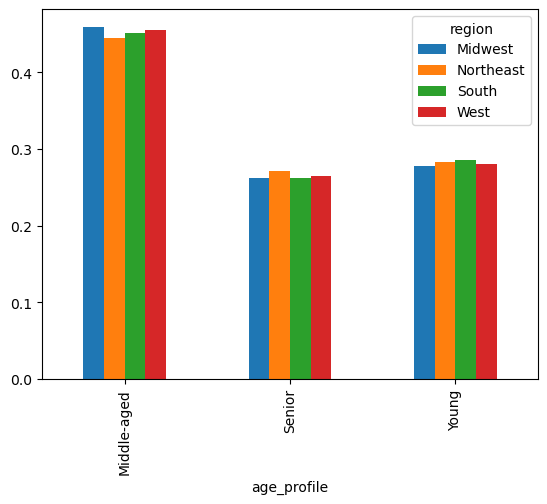

In [107]:
# age_profile by region

age_region_bar = age_region_cross.plot.bar()

In [108]:
# Exporting viz

age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_bar.png'))

#### Income

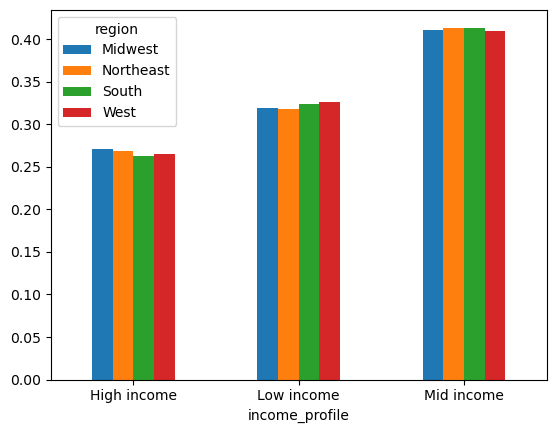

In [109]:
# income_profile by region

income_region_bar = income_region_cross.plot.bar()

In [110]:
# Exporting viz

income_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_bar.png'))

#### Veganism

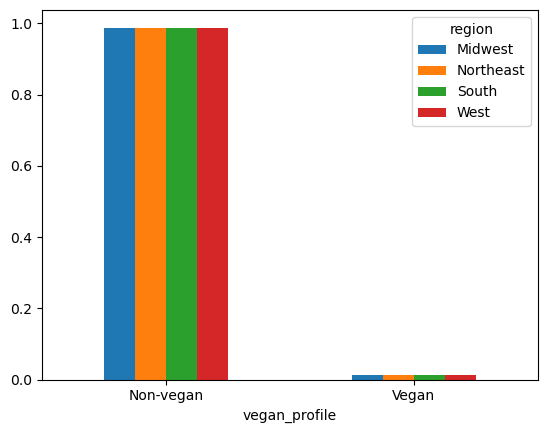

In [112]:
# vegan_profile by region

vegan_region_bar = vegan_region_cross.plot.bar()

In [113]:
# Exporting viz

vegan_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegan_region_bar.png'))

#### Pet ownership

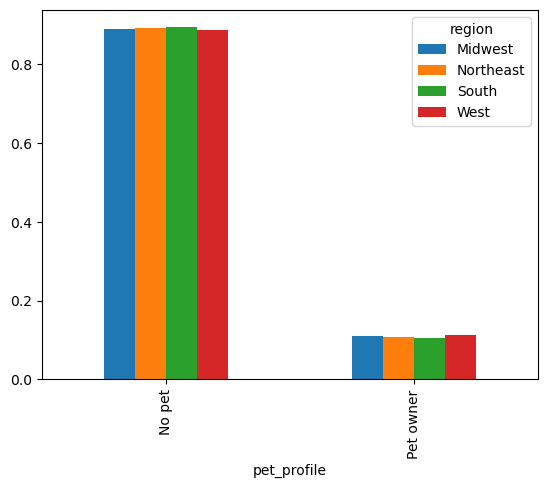

In [114]:
# vegan_profile by region

pet_region_bar = pet_region_cross.plot.bar()

In [115]:
# Exporting viz

pet_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_region_bar.png'))

#### Family status

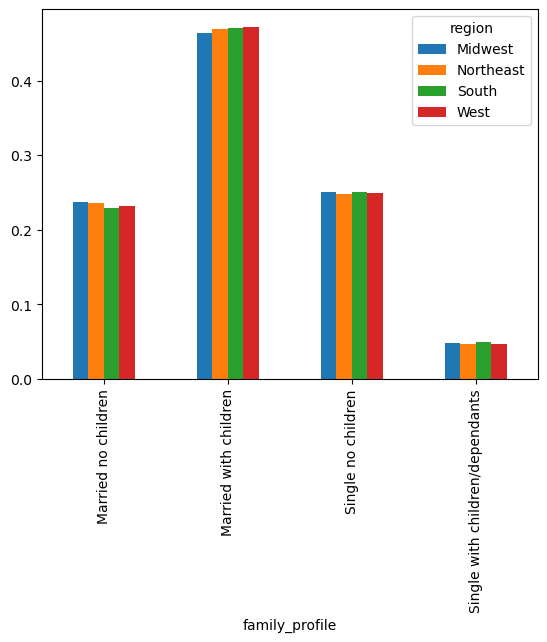

In [116]:
# family_profile by region

family_region_bar = family_region_cross.plot.bar()

In [117]:
# Exporting viz

family_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_region_bar.png'))

### Visualizations for Profiles by Department

#### Age

In [118]:
# Creating a new crosstab so that the departments are on the x-axis

age_department_cros = pd.crosstab(df_combined['department_id'], df_combined['age_profile'])

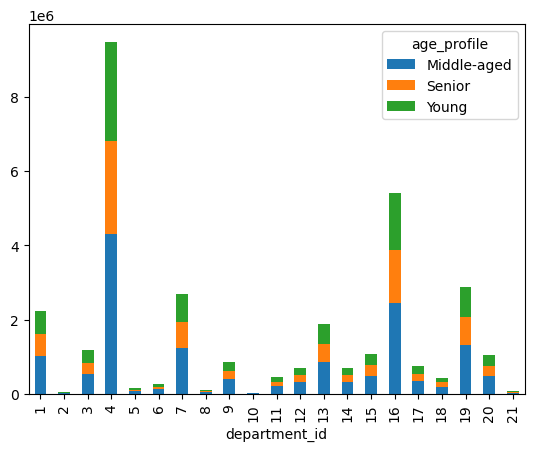

In [119]:
# Creating a stacked bar plot of the new crosstab

age_department_bar = age_department_cros.plot.bar(stacked = True)

In [120]:
# Exporting the viz

age_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_department_bar.png'))

#### Income

In [95]:
# Creating a new crosstab so that the departments are on the x-axis

income_department_cros = pd.crosstab(df_combined['department_id'], df_combined['income_profile'])

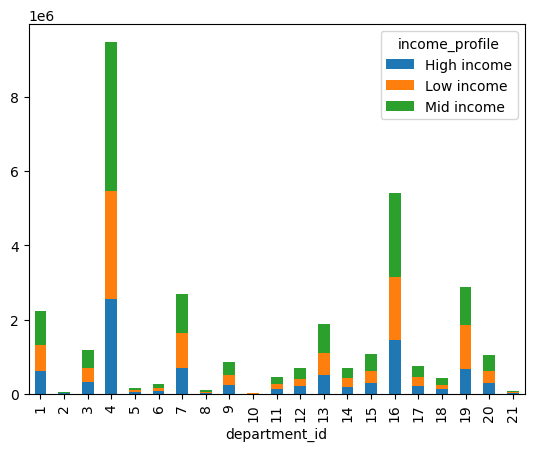

In [96]:
# Creating a stacked bar plot of the new crosstab

income_department_bar = income_department_cros.plot.bar(stacked = True)

In [123]:
# Exporting the viz

income_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_department_bar.png'))

#### Veganism

In [88]:
# Creating a new crosstab so that the departments are on the x-axis

vegan_department_cros = pd.crosstab(df_combined['department_id'], df_combined['vegan_profile'], )

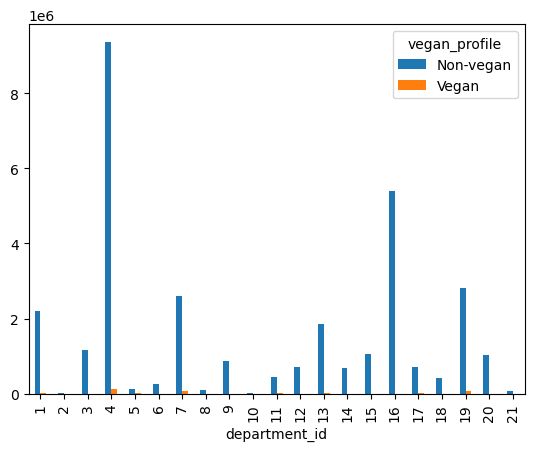

In [89]:
# Creating a stacked bar plot of the new crosstab

vegan_department_bar = vegan_department_cros.plot.bar()

In [87]:
# Exporting the viz

vegan_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vegan_department_bar.png'))

#### Pet Ownership

In [90]:
# Creating a new crosstab so that the departments are on the x-axis

pet_department_cros = pd.crosstab(df_combined['department_id'], df_combined['pet_profile'], normalize = 'index')

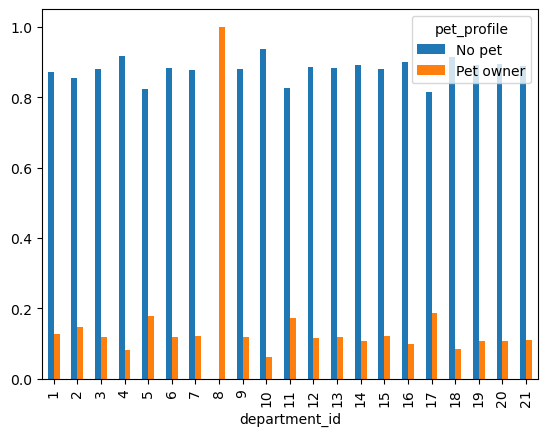

In [91]:
# Creating a stacked bar plot of the new crosstab

pet_department_bar = pet_department_cros.plot.bar()

In [92]:
# Exporting the viz

pet_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pet_department_bar.png'))

#### Family Status

In [129]:
# Creating a new crosstab so that the departments are on the x-axis

family_department_cros = pd.crosstab(df_combined['department_id'], df_combined['family_profile'])

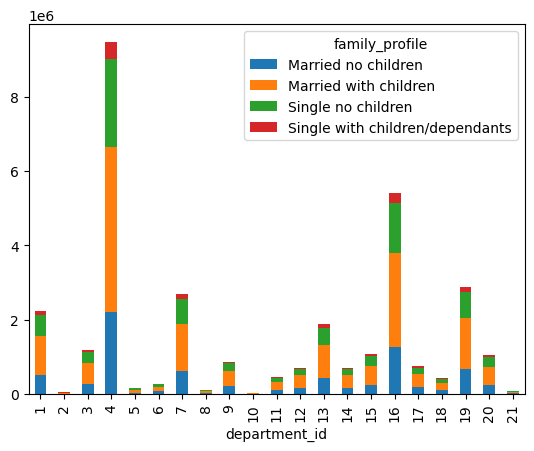

In [130]:
# Creating a stacked bar plot of the new crosstab

family_department_bar = family_department_cros.plot.bar(stacked = True)

In [131]:
# Exporting the viz

family_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'family_department_bar.png'))

## Step 10: Exporting the data file

In [99]:
# Exporting final data set  

df_combined.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'all_combined_final.pkl'))

## Further analysis to answer other project questions

### Question: Are there differences in ordering habits based on a customer’s loyalty status?

In [7]:
# Creating a crosstab comparing 'loyalty_flag' and 'department_id', looking at row percentages

loyalty_department_cross = pd.crosstab(df_combined['department_id'], df_combined['loyalty_flag'], normalize = 'index')  

In [8]:
loyalty_department_cross

loyalty_flag,Loyal customer,New customer,Regular customer
department_id,,,
1,0.272720,0.217154,0.510126
2,0.295252,0.212697,0.492050
3,0.324005,0.190804,0.485191
4,0.332027,0.183202,0.484772
5,0.251945,0.245276,0.502778
6,0.291154,0.212079,0.496767
7,0.318072,0.190791,0.491136
8,0.260643,0.210160,0.529197
9,0.279913,0.218464,0.501623


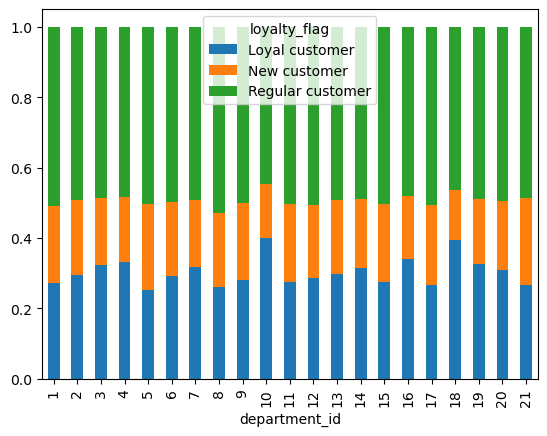

In [11]:
# Creating a stacked bar chart

loyalty_department_bar = loyalty_department_cross.plot.bar(stacked = True)

In [12]:
# Exporting the viz

loyalty_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_department_bar.png'))

### Question: Are there differences in ordering habits based on a customer’s region?													

In [22]:
# Creating a crosstab comparing 'region' and 'department_id', looking at row percentages

region_department_cross = pd.crosstab(df_combined['department_id'], df_combined['region'], normalize = 'index')  

In [23]:
region_department_cross

region,Midwest,Northeast,South,West
department_id,,,,
1,0.234522,0.174927,0.334669,0.255881
2,0.232013,0.181450,0.336502,0.250034
3,0.233591,0.177921,0.331632,0.256856
4,0.235032,0.175735,0.333416,0.255817
5,0.235439,0.172692,0.335884,0.255986
6,0.236714,0.174152,0.331072,0.258062
7,0.232718,0.179835,0.334412,0.253036
8,0.228775,0.190358,0.319999,0.260868
9,0.235129,0.175180,0.331681,0.258010


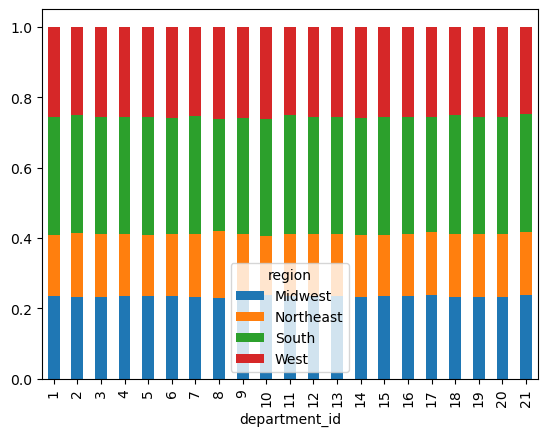

In [25]:
# Creating a stacked bar chart

region_department_bar = region_department_cross.plot.bar(stacked = True)

In [28]:
# Exporting the viz

region_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_department_bar.png'))

### Question: Are there certain types of products that are more popular than others?																								


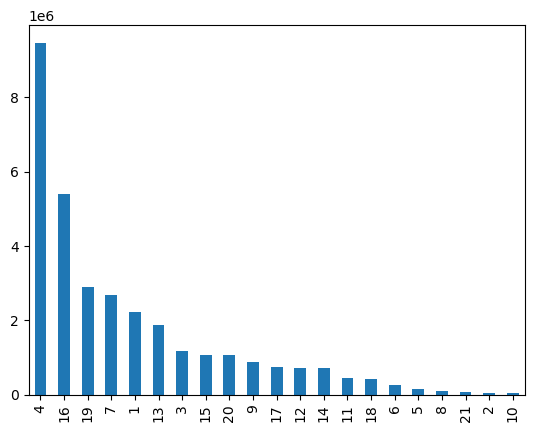

In [97]:
# Bar chart for department_id

department_id_bar = df_combined['department_id'].value_counts().plot.bar()

In [98]:
# Exporting the viz

department_id_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'department_id_bar.png'))